In [1]:
import pandas as pd
import numpy as np
from run_and_query_PLEXOS import run_model, query_model_prices, query_capacity_factor
from calculate_loss_factor import loss_factor, loss_factor_DUID_CF
import matplotlib.pyplot as plt



:: PyDotnet :: Seamless ::
The module for integration of PyDotnet with Interactive Python

::: FEATURES :::
- Use help() on any .NET namespace, class, object, method at will
- Use help(dotnet.clr) to obtain list of namespaces an assemblies
- Use help() on imported namespaces, e.g.
     import System.Collections
     help(System.Collections)

- Use help() on types, e.g. `help(List)`
- Use help() on constructors, e.g. `help(List.__createinstance__)`
- Use help() on unbound methods, e.g. `help(List[Int32].FindIndex)`
- Use help() on bound methods, e.g. `help(myList.FindIndex)`

- Use type(), isinstance(), issubclass() on .NET objects and types

- Generic method support is ON
- Extension method support is ON

!!! IMPORTANT !!!
Please, remember to NOT USE 'import dotnet.seamless' IN PRODUCTION CODE. This
module is provided for you, so you can use it when you browse around .NET world
while in Python interactive mode.

!!! WARNING !!!
This module overrides help(), type(), isinstance(), issub

## Inputs:


In [2]:

start_date = '1/7/2018'
end_date = '30/6/2019'

re_run_model = False




#### Set up the necessary parameters

In [3]:

price_curve = pd.read_csv("D:\Tools and templates\Static Bidding Optimisation\Data_Files\FY19Prices.csv")
price_curve['Date'] = price_curve['Date'].apply(lambda x : pd.to_datetime(x, format='%d/%m/%Y'))
price_curve = price_curve[price_curve['Date'] >= pd.to_datetime(start_date, format='%d/%m/%Y')]
price_curve = price_curve[price_curve['Date'] <= pd.to_datetime(end_date, format='%d/%m/%Y')]
price_curve = price_curve.drop(columns=['Date'])
for col in price_curve:
    price_curve[col] = price_curve[col].sort_values(ascending=False).values
    price_curve[col] = price_curve[col].apply(lambda x : max(x,1))
    
duid_details = pd.read_csv("D:\Tools and templates\Static Bidding Optimisation\Data_Files\DUIDDetails.csv")
gen_cap_factors = duid_details.set_index('DUID').to_dict()['FY19CF']


#### Calculate the Loss Functions and plot charts

QLD


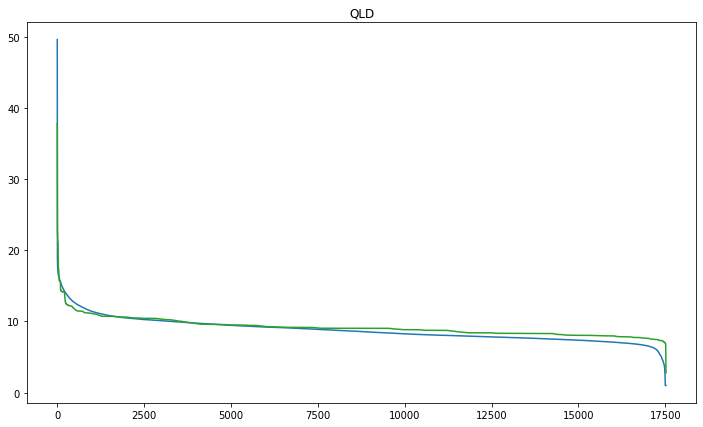

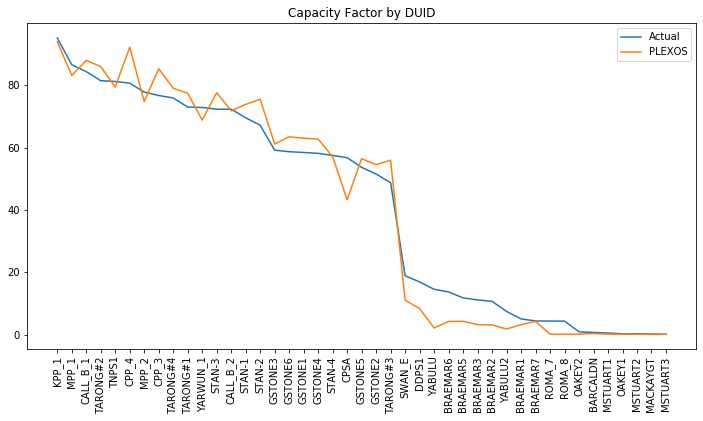

9601.605839030337

NSW


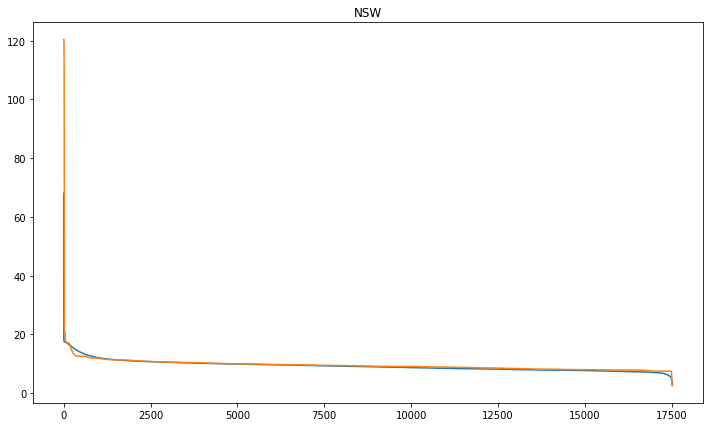

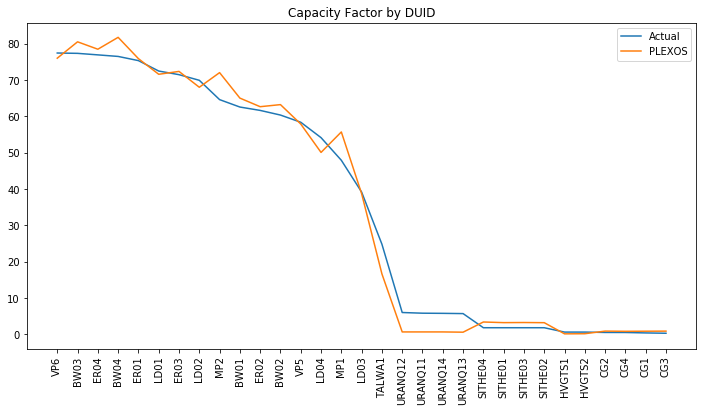

3680.028338148127

VIC


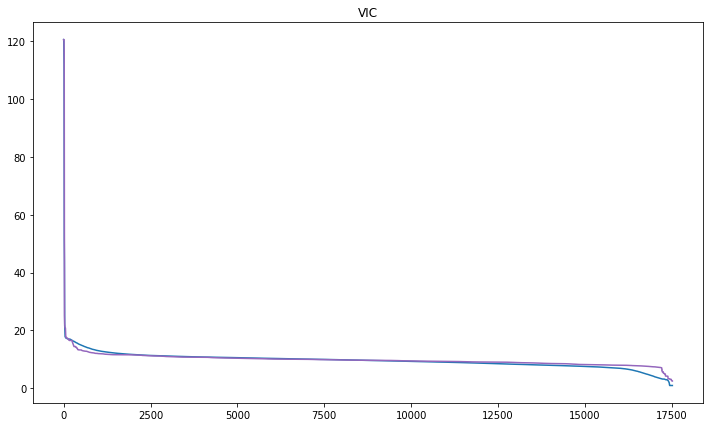

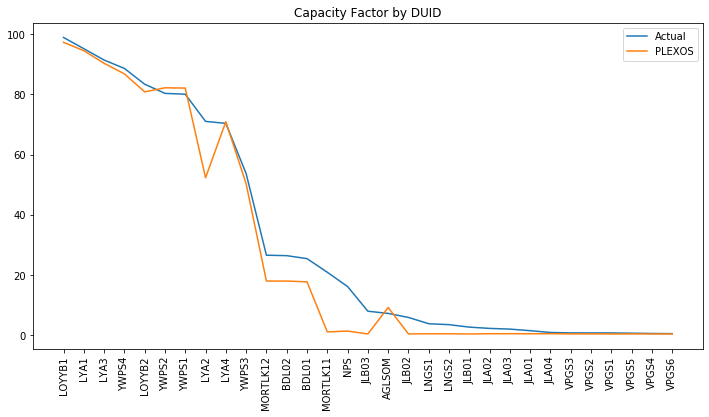

12822.933144235913

SA


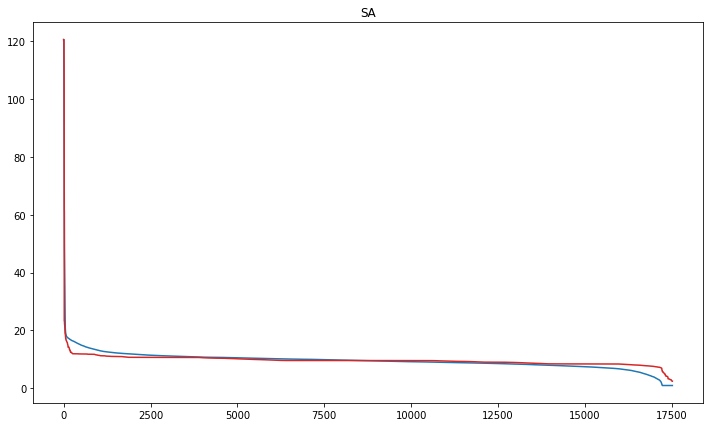

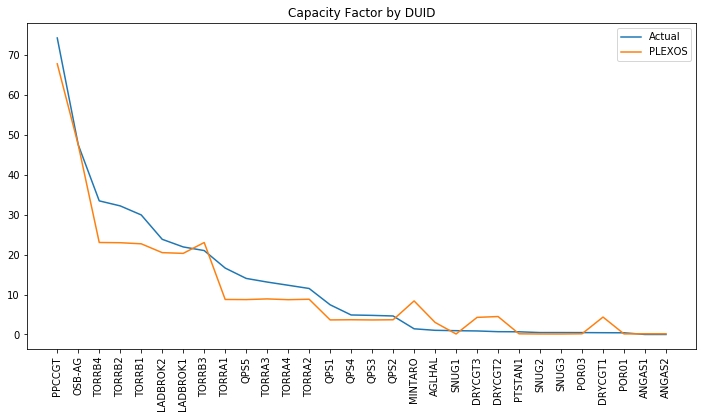

5465.072382518951

  Region     PDCurveLF     CFCurveLF
0    QLD   8546.774724   9601.605839
1    NSW   7073.493338   3680.028338
2    VIC   9538.111463  12822.933144
3     SA  15734.397865   5465.072383


,Region,PDCurveLF,CFCurveLF
0,QLD,8546.774724,9601.605839
1,NSW,7073.493338,3680.028338
2,VIC,9538.111463,12822.933144
3,SA,15734.397865,5465.072383


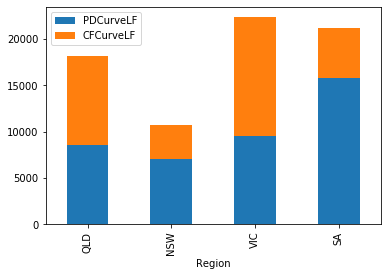

In [4]:

result_values = []

# run model
if re_run_model: 
    print("running model")
    run_model()
    
# query the solution files
results = query_model_prices(start_date, end_date)
capacity_factor_results = query_capacity_factor(start_date, end_date)

for region in ['QLD', 'NSW', 'VIC', 'SA']:
    region_list = [region]
    print(region)
    lf = loss_factor(price_curve, region, results, [None, None], True, True)
    print()
    lf_cf = loss_factor_DUID_CF(gen_cap_factors, capacity_factor_results, duid_details, region_list, True)
    print(lf_cf)
    print()
    result_values.append({'Region':region, 'PDCurveLF':lf, 'CFCurveLF':lf_cf})

df = pd.DataFrame(data=result_values, columns=['Region', 'PDCurveLF', 'CFCurveLF'])
print(df)
display(df)
df.set_index('Region').plot(kind='bar', stacked=True)
